**Movie Recommending System**
1.   Data Fetching
2.   Data Processing
3.   Text Preprocessing
2.   Vectorizing
3.   Model Training


In [ ]:
#Impoerting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import string
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Fetching

In [ ]:
#Fetching Data
movie_data=pd.read_csv('train_data.txt',sep=':::',engine='python',names=['Title','Genre','Description'])

In [ ]:
#First 10 rows
movie_data.head(10)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [ ]:
print(movie_data.shape)

(40135, 3)


## Data Processing

In [ ]:
#Information mabout the data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40135 entries, 1 to 40135
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        40135 non-null  object
 1   Genre        40135 non-null  object
 2   Description  40135 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
#Null Values
movie_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
#Duplicated Data
dupe = movie_data.duplicated().sum()
dupe

0

In [ ]:
# Description of Data
movie_data.describe()

,Title,Genre,Description
count,40135,40135,40135
unique,40135,27,40056
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,10065,10


In [ ]:
# Genre Value Count
movie_data['Genre'].value_counts()

 drama           10065
 documentary      9671
 comedy           5532
 short            3776
 horror           1615
 thriller         1207
 action            976
 western           763
 reality-tv        656
 family            583
 adventure         561
 music             548
 romance           486
 sci-fi            486
 adult             441
 animation         370
 crime             362
 sport             316
 talk-show         296
 mystery           243
 fantasy           233
 musical           193
 history           186
 biography         184
 game-show         145
 news              143
 war                98
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' adventure '),
  Text(11, 0, ' music '),
  Text(12, 0, ' romance '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' adult '),
  Text(15, 0, ' animation '),
  Text(16, 0, ' crime '),
  Text(17, 0, ' sport '),
  Text(18, 0, ' talk-show '),
  Text(19, 0, ' mystery '),
  Text(20, 0, ' fantasy '),
  Text(21, 0, ' musical '),
  Text(22, 0, ' history '),
  Text(23, 0, ' biography '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

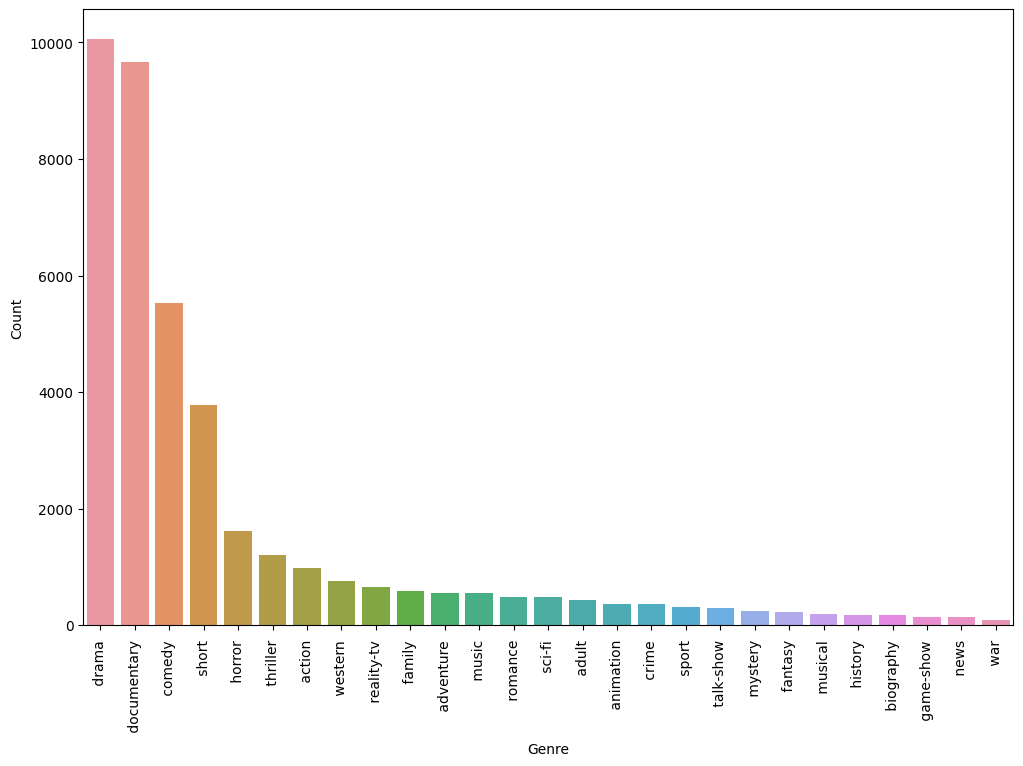

In [ ]:
#Plotting Bar Graph
plt.figure(figsize=(12,8))
counts = movie_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

In [ ]:
#Label Encoding
label_encode = LabelEncoder()

In [ ]:
# transforming
movie_data['genre_count'] = label_encode.fit_transform(movie_data['Genre'])

In [ ]:
movie_data.head()

,Title,Genre,Description,genre_count
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


## Text Preprocessing

In [ ]:
# create an object for stemming
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  #lower case
  text.lower()

  #tokenization
  text = nltk.word_tokenize(text)

  #special character
  temp = []
  for i in text:
    if i.isalnum():
      temp.append(i)
  text = temp[:]
  temp.clear()
  #stop words
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      temp.append(i)
  text = temp[:]
  temp.clear()
  # Stemming
  for i in text:
    temp.append(ps.stem(i))
  text = temp[:]

  return " ".join(text)

In [ ]:
#Transforming data
movie_data["transformed"] = movie_data["Description"].apply(transform_text)

In [ ]:
movie_data.head()

,Title,Genre,Description,genre_count,transformed
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listen convers doctor parent oscar learn nobod...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,a brother sister past incestu relationship cur...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,as bu empti student field trip museum natur hi...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,to help unemploy father make end meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,the film titl refer bodi ground zero also stat...


## Vectorization

In [ ]:
# Vectorization : >>Bag of words  >>Tf-idf  >>word to vect
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=9000)

In [ ]:
# X = cv.fit_transform(spam_clas["transformed"]).toarray()
X_data = tfidf.fit_transform(movie_data["transformed"]).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_data = scale.fit_transform(X_data)

In [ ]:
X_data.shape

(40135, 9000)

In [ ]:
y_train = movie_data.Genre
y_train

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
40131          comedy 
40132          comedy 
40133     documentary 
40134     documentary 
40135         western 
Name: Genre, Length: 40135, dtype: object

Splitting Data

In [ ]:
# Splitting Training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,y_train,test_size = 0.2, random_state=2)

## Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [ ]:
# svc = SVC(kernel = 'linear',gamma =1)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# Multinomial Naive Baye's
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2,average='micro'))
print(f1_score(Y_test, y_pred2, average="micro"))

0.5369378348075245
[[  35    0    1    0    0   27    0   30  103    0    0    0    0    9
     0    0    0    0    0    0    0    4    6    0    6    0    2]
 [   0   16    9    0    0   41    0    3   26    0    0    0    0    2
     0    0    0    0    0    0    0    9    0    0    0    0    0]
 [   5    8   11    0    0   14    0   24   37    0    0    0    0    2
     0    0    0    0    1    0    2    5    1    0    3    0    1]
 [   3    0    0    1    0   25    0   17   21    1    0    0    0    1
     2    0    0    0    0    0    1    4    0    0    1    0    0]
 [   0    0    0    0    0    2    0   25   10    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    2    0    0]
 [   2    0    0    0    0  595    0   76  359    0    0    0    0   13
     2    0    0    0    2    0    0   26    0    1    3    0    2]
 [   3    0    0    0    0   18    0    7   53    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    7    0    0]
 

In [ ]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1,average='macro'))
print(f1_score(Y_test, y_pred1, average="micro"))

0.2349570200573066
[[ 30   0   5   1   0  47   4  27  37   2   0   0   0  10   0   1   1   0
    1   1   6  31   4   0  13   0   2]
 [  2   7   5   0   0  34   0   4  14   2   0   0   0   7   0   0   1   0
    0   0   0  22   0   0   7   0   1]
 [  5   4  10   0   0  18   0  20  13   0   1   0   0   7   0   0   0   0
    2   1   1  28   0   0   4   0   0]
 [  9   0   1   3   0  17   0  11   1   3   0   0   0   5   1   0   0   0
    2   0   0  21   0   0   3   0   0]
 [  2   0   1   0   0   6   0  11   6   2   0   0   0   3   0   0   0   0
    0   0   0   8   0   0   1   0   0]
 [ 29  10  15   4   0 329  11  80 111  16   0   0   0  65   4   1   1   2
   20  26   3 268   0   1  78   0   7]
 [  7   2   1   0   0  14   2   4  14   2   0   0   0  10   0   0   1   0
    0   0   1  25   0   0   5   0   1]
 [ 39   4  17   4   1 176   7 686 127  24   0   0   1  47  16   0   0   1
   24  10   7 682   3   6  64   0   0]
 [ 72   9  17  10   4 348  22 187 314  33   5   0   3 112  10   8   7   0
   

In [ ]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3,average='macro'))
print(f1_score(Y_test, y_pred3, average="micro"))

0.5201195963622773
[[  78    0    2    0    0   25    0   16   52    0    0    0    0    6
     1    0    0    0    0    1    3   21    4    0   14    0    0]
 [   0   20    7    0    0   48    0    0   10    0    0    0    0    1
     0    0    0    0    0    0    0   20    0    0    0    0    0]
 [   7    8   20    0    0   20    0   13   15    0    0    0    0    3
     0    0    0    0    5    1    5   15    0    0    0    0    2]
 [   3    0    4    1    0   23    0    8    8    7    0    0    0    3
     1    0    0    0    0    0    3   16    0    0    0    0    0]
 [   0    0    0    0    0    4    0   20    6    0    0    0    0    1
     1    0    0    0    0    0    0    6    1    0    1    0    0]
 [  13    2    0    1    0  699    4   32  184    3    0    0    0    8
     8    0    7    0    7   22    0   75    1    4    9    0    2]
 [  10    0    0    0    0   21    2    2   22    0    0    0    0    4
     0    0    0    0    0    1    0    9    0    0   18    0    0]
 

In [ ]:
lrc.fit(X_train,Y_train)
y_pred4 = lrc.predict(X_test)
print(accuracy_score(Y_test,y_pred4))
print(confusion_matrix(Y_test,y_pred4))
print(precision_score(Y_test,y_pred4,average='micro'))
print(f1_score(Y_test, y_pred4, average="macro"))

0.5665877662887754
[[  55    1    0    1    0   24    4   17   83    1    0    0    0    7
     0    0    0    0    0    0    6    5    5    0   10    0    4]
 [   0   32    5    0    0   27    0    3   26    0    0    0    0    2
     0    0    1    0    0    0    0    9    0    0    0    0    1]
 [   6    2   25    1    0    8    0   23   30    0    0    0    0    4
     0    0    0    0    3    1    4    3    1    0    1    0    2]
 [   2    0    2   13    0   17    0   13   10    8    1    0    0    1
     1    0    0    0    0    0    1    8    0    0    0    0    0]
 [   0    0    0    0    0    3    0   21   11    0    0    0    0    1
     1    0    0    0    0    0    0    1    0    0    2    0    0]
 [  12    2    1    0    0  603    2   68  320    3    1    0    0    8
     1    0    2    0    5    1    1   40    1    4    3    1    2]
 [   6    0    0    0    0   17    4    9   34    0    0    0    0    5
     0    0    1    0    0    0    0    1    1    0   10    0    1]
 

Evaluatting the Model

In [ ]:
# new_movie_description = "One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products"
# new_movie_description = "His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are against him and when stakes are the highest, Diego gets a visit from a very uncommon man."
# new_movie_description = "Emily Burns is being held captive in a room with no idea as to why or how she got there. Determined to escape and return to her daughter and husband, Emily discovers clues within the room that help explain what she's doing there. They even provide clues about who she is...but will they help her escape?"
new_movie_description  = "Vasu Inamdar (Ina) suffers from a disorder where the pictures which he sees comes in his dreams and turn into reality. He discusses this with his wife Shalu and his best friend Digamber Minapure (Mina), Shalu then gets help from Dr A.Z Dcosta (Dika), but Dika turns out to be a fraud and he takes advantage of Shalu and puts her to sleep so that he can avail it in real, Mina comes to know that Dika was taken advantage of and decides to teach him a lesson by bringing the truth in front of everyone."
SMS_transform = transform_text(new_movie_description)
#vectorize
vector_input = tfidf.transform([SMS_transform])
# Model Prediction
predicted_genre = lrc.predict(vector_input)
# Display of Results
# Make predictions on new data
print("Predicted Genre:", predicted_genre[0])

Predicted Genre:  comedy 


Project End